# One sample and two sample  (test for mean and not for proportion) 

## One sample test

In one sample test, we compare the population parameter such as mean of a single sample of data collected from a single population. 

### 1) Z test

A one sample Z test is one of the most basic types of hypothesis test. 

### Example 1: A principal of a prestigious city college claims that the average intelligence of the students of the college is above average. 

A random sample of 100 students IQ scores have  a mean score of 115. The mean population mean IQ is 100 with a standard deviation of 15.

**Is there sufficient evidence to support the principal's claim?**


### Solution: Let us work through the several required steps

In [1]:
import numpy       as np
import pandas      as pd
import scipy.stats as stats

### Step 1: Define null and alternative hypotheses

In testing whether the mean IQ of the students is more than 100, the null hypothesis states that mean IQ, $\mu$ equals 100. The alternative hypthesis states that the mean IQ, $\mu$ is greater  than 100.
* $H_0$: $\mu$ = 100
* $H_A$: $\mu$ > 100

### Step 2: Decide the significance level

Here we select $\alpha$ = 0.05 and it is given that n, sample size = 100.

### Step 3: Identify the test statistic

We know the population standard deviation and the sample is a large sample, n>30. So you use the normal distribution and the $Z_STAT$ test statistic.

### Step 4: Calculate the critical value and test statistic

In [2]:
Zcrit = round(stats.norm.isf(q = 0.05),2)
print('Value of Z critical is %3.6f' %Zcrit)              

Value of Z critical is 1.640000


We know the $\alpha$ is 0.05. So, the critical values of the $Z_STAT$ test statistic is 1.64

We collect the sample data, calculate the test statistic. 
In our example, 
* $\overline{X}$ = 115
* $\mu$          = 100
* $\sigma$       = 15
* n              = 100
* $Z_{STAT} = \frac{\overline{X} - \mu} {\frac{\sigma}{\sqrt{n}}}$ 

In [3]:
XAvg  = 115
mu    = 100
sigma = 15
n     = 100
Z = (XAvg - mu)/(sigma/np.sqrt(n))
print('Value of Z is %2.5f' %Z)

Value of Z is 10.00000


### 5 Decide to reject or accept null hypothesis

In this example, Z = 10 lies in the rejection region because, Z = 0.00047 > 1.64.

So the statistical decision is to reject the null hypothesis.

### So there is sufficient evidence  to prove that the mean average intelligence of the students of the college is above average.


### 2) t test

### Very rarely we know the variance of the population. 

A common strategy to assess hypothesis is to conduct a t test. A t test can tell whether two groups have the same mean. 
A t test can be estimated for:
* 1) One sample t test
* 2) Two sample t test (including paired t test)

We assume that the samples are randomly selected, independent and come from a normally distributed population with unknown but equal variances.

### One sample t test

In [4]:
from scipy.stats             import ttest_1samp,ttest_ind, wilcoxon
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot     as     plt

### Example 2

Suppose that a doctor claims that 17 year olds have an average body temperature that is higher than the commonly accepted average human temperature of 98.6 degree F.

A simple random statistical sample of 25 people, each of age 17 is selected. 

| ID | Temperature |
| --- | ----- |
| 1 | 98.56 | 
| 2 | 98.66 |
| 3 | 97.54 |
| 4 | 98.71 |
| 5 | 99.22 |
| 6 | 99.49 |
| 7 | 98.14 |
| 8 | 98.84 |
| 9 | 99.28 |
| 10 | 98.48 |
| 11 | 98.88 |
| 12 | 97.29 |
| 13 | 98.88 |
| 14 | 99.07 |
| 15 | 98.81 |
| 16 | 99.49 |
| 17 | 98.57 |
| 18 | 97.98 |
| 19 | 97.75 |
| 20 | 97.69 |
| 21 | 99.28 |
| 22 | 98.52 |
| 23 | 98.82 |
| 24 | 98.81 |
| 25 | 98.22 |


In [5]:
temperature = np.array([98.56, 98.66, 97.54, 98.71, 99.22, 99.49, 98.14, 98.84,\
                         99.28, 98.48, 98.88, 97.29, 98.88, 99.07, 98.81, 99.49,\
                         98.57, 97.98, 97.75, 97.69, 99.28, 98.52, 98.82, 98.81, 98.22])            

In [6]:
print('Mean is %2.1f Sd is %2.1f' % (temperature.mean(),np.std(temperature,ddof = 1)))

Mean is 98.6 Sd is 0.6


### Step 1: Define null and alternative hypotheses

In testing whether 17 year olds have an average body temperature that is higher than 98.6 deg F,the null hypothesis states that mean bdy temperature, $\mu$ equals 98.6. The alternative hypthesis states that the mean body temprature, $\mu$ is greater  than 98.6.

* $H_0$: $\mu$ = 98.6
* $H_A$: $\mu$ > 98.6

### Step 2: Decide the significance level

Here we select $\alpha$ = 0.05 and it is given that n, sample size = 25.

### Step 3: Identify the test statistic

We do not know the population standard deviation and the sample is not a large sample, n < 30. So you use the t distribution and the $t_STAT$ test statistic.

### Step 4: Calculate the p - value and test statistic

**scipy.stats.ttest_1samp calculates the t test for the mean of one sample given the sample observations and  the expected value in the null hypothesis. This function returns t statistic and two-tailed p value.**

In [7]:
t_statistic, p_value = ttest_1samp(temperature, 98.9)

In [8]:
print(t_statistic, p_value)

-2.507394613271926 0.019333111622388346


### Step 5 Decide to reject or accept null hypothesis

In this example, p value is 0.0193 and it is less than 5% level of significance

So the statistical decision is to reject the null hypothesis at 5% level of significance.

### So there is sufficient evidence  to prove that 17 year olds have an average body temperature that is higher than the commonly accepted average human temperature of 98.6 degree F.

### Practice Exercise 1

You are given the daily sugar intake of 11 diabetic patients in the following Python code. 

**Is there any evidence to the claim that the average daily sugar intake of the diabetic patients is 7600 mg.** 

**Hint: Use t test**

In [1]:
# daily intake of Sugar in milligrams for 11 diabetic patients
import scipy.stats as stats
import numpy as np
daily_intake = np.array([5560, 5770, 7640, 5180, 5690, 6435, 6803, 7689, 6876, 8213, 8765])daily_intake

## Two sample test

** Two sample t test (Snedecor and Cochran 1989) is used to determine if two population means are equal.
A common application is to test if a new treatment or approach or process is yielding better results than the current treatment or approach or process.**

* 1) Data is *paired* - For example, a group of students are given coaching classes and effect of coaching on the  marks scored is determined.
* 2) Data is *not paired* - For example, find out  whether the miles per gallon of  cars of Japanese make is superior to cars of Indian make.

## Two sample t test for unpaired data is defined as 
* $H_0$: $\mu1$        = $\mu2$ 
* $H_a$: $\mu1$ $\neq$ = $\mu2$ 

### Test statistic T = $\frac{\overline{X_1} - \overline{X_2}}{\sqrt{\frac{{s_1}^2} {n1}+ \frac{{s_2}^2}{n2}}}$

* where n1 and n2 are the sample sizes and X1 and X2 are the sample means 
* ${S_1}^2$ and ${S_2}^2$ are sample variances

### Example 3

Compare two unrelated samples. Data was collected on the weight loss of 16 women and 20 men enrolled in a weight reduction program.
At $\alpha$ = 0.05, test whether the weight loss of these two samples is different.

In [10]:
Weight_loss_Male   = [ 3.69, 4.12, 4.65, 3.19,  4.34, 3.68, 4.12, 4.50, 3.70, 3.09,3.65, 4.73, 3.93, 3.46, 3.28, 4.43, 4.13, 3.62, 3.71, 2.92]
Weight_loss_Female = [2.99, 1.80, 3.79, 4.12, 1.76, 3.50, 3.61, 2.32, 3.67, 4.26, 4.57, 3.01, 3.82, 4.33, 3.40, 3.86]

In [2]:
from    scipy.stats             import  ttest_1samp,ttest_ind, wilcoxon, ttest_ind_from_stats
import  scipy.stats             as      stats  
from    statsmodels.stats.power import  ttest_power
import  matplotlib.pyplot       as      plt

### Step 1: Define null and alternative hypotheses

In testing whether weight reduction of female and male are same,the null hypothesis states that mean weight reduction, $\mu{M}$ equals $\mu{F}$. The alternative hypthesis states that the weight reduction is different for Male and Female, $\mu{M}$ $\neq$ $\mu{F}$

* $H_0$: $\mu{M}$ - $\mu{F}$ =      0
* $H_A$: $\mu{M}$ - $\mu{F}$ $\neq$  0

### Step 2: Decide the significance level

Here we select $\alpha$ = 0.05 and sample size < 30 and population standard deviation is not known.

### Step 3: Identify the test statistic

* We have two samples and we do not know the population standard deviation.
* Sample sizes for both samples are not same.
* The sample is not a large sample, n < 30. So you use the t distribution and the $t_STAT$ test statistic for two sample unpaired test.

### Step 4: Calculate the p - value and test statistic

** We use the scipy.stats.ttest_ind to calculate the t-test for the means of TWO INDEPENDENT samples of scores given the two sample observations. This function returns t statistic and two-tailed p value.**

** This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances.**

In [12]:
t_statistic, p_value  =  stats.ttest_ind(Weight_loss_Male,Weight_loss_Female)
print('P Value %1.3f' % p_value)    

P Value 0.076


### Step 5:  Decide to reject or accept null hypothesis

In this example, p value is 0.076 and it is more than 5% level of significance

So the statistical decision is to accept the null hypothesis at 5% level of significance.

### So there is no sufficient evidence  to reject the null hypothesis that the weight loss of these men and women is same.

### Practice Exercise 2

Compare the following two unrelated samples. Data was collected on the weight of women and men enrolled in a weight reduction program.
At $\alpha$ = 0.05, test whether the weight of these two samples is different.

Ttest_indResult(statistic=4.886344172533444, pvalue=0.00024034957515992796)

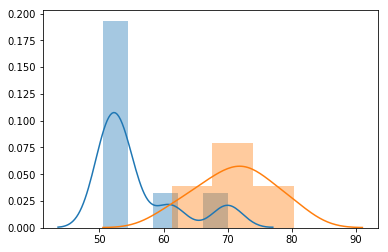

In [6]:
Weight_Female       =  [ 53.8, 54.4, 51.2, 52.5, 61.0, 50.6, 51.6, 70.0]
Weight_Male         =  [ 72.5, 80.3, 71.3, 67.7, 66.2, 73.4, 61.3, 76.8]
sns.distplot(Weight_Female)
sns.distplot(Weight_Male)
stats.ttest_ind(Weight_Male,Weight_Female)

## Two sample t test for paired data

### Example 4

Compare two related samples. Data was collected on the marks scored by 25 students in their final practice exam and the marks scored by the students after attending special coaching classes conducted by their college.
At 5% level of significance, is there any evidence that the coaching classes has any effect on the marks scored.

In [14]:
Marks_before = [ 52, 56, 61, 47, 58, 52, 56, 60, 52, 46, 51, 62, 54, 50, 48, 59, 56, 51, 52, 44, 52, 45, 57, 60, 45]

Marks_after  = [62, 64, 40, 65, 76, 82, 53, 68, 77, 60, 69, 34, 69, 73, 67, 82, 62, 49, 44, 43, 77, 61, 67, 67, 54]

## Step 1: Define null and alternative hypotheses

In testing whether coaching has any effect on marks scored, the null hypothesis states that difference in marks, $\mu{After}$ equals $\mu{Before}$. The alternative hypthesis states that difference in marks is more than 0, $\mu{After}$ $\neq$ $\mu{Before}$

* $H_0$: $\mu{After}$ - $\mu{Before}$ =  0
* $H_A$: $\mu{After}$ - $\mu{Before}$ $\neq$  0

### Step 2: Decide the significance level

Here we select $\alpha$ = 0.05 and sample size < 30 and population standard deviation is not known.

### Step 3: Identify the test statistic

* Sample sizes for both samples are  same.
* We have two paired samples and we do not know the population standard deviation.
* The sample is not a large sample, n < 30. So you use the t distribution and the $t_STAT$ test statistic for two sample paired test.

### Step 4: Calculate the p - value and test statistic

** We use the scipy.stats.ttest_rel to calculate the T-test on TWO RELATED samples of scores.
This is a two-sided test for the null hypothesis that 2 related or repeated samples have identical average (expected) values. Here we give the two sample observations as input. This function returns t statistic and two-tailed p value.**

In [15]:
import  scipy.stats             as      stats  
t_statistic, p_value  =  stats.ttest_rel(Marks_after, Marks_before )
print('P Value %1.3f' % p_value)  

P Value 0.002


### Step 5:  Decide to reject or accept null hypothesis

In this example, p value is 0.002 and it is less than 5% level of significance

So the statistical decision is to reject the null hypothesis at 5% level of significance.

### So there is  sufficient evidence  to reject the null hypothesis that there is an effect of coaching classes on marks scored by students.

### Example 5
** Alchohol consumption before and after love failure is given in the following table. Conduct a paired t test to check whether the alcholhol consumption is more after the love failure at 5% level of significance.**

## Step 1: Define null and alternative hypotheses

In testing whether breakup has any effect on alcohol consumption, the null hypothesis states that difference in alcohol consumption, $\mu{After}$ - $\mu{Before}$ is zero. The alternative hypthesis states that difference in alcohol consumption is more than 0, $\mu{After}$ -  $\mu{Before}$ $\neq$ zero.

* $H_0$: $\mu{After}$ - $\mu{Before}$ =  0
* $H_A$: $\mu{After}$ - $\mu{Before}$ $\neq$  0

### Step 2: Decide the significance level

Here we select α = 0.05 and sample size < 30 and population standard deviation is not known.

### Step 3: Identify the test statistic

* Sample sizes for both samples are  same.
* We have two paired samples and we do not know the population standard deviation.
* The sample is not a large sample, n < 30. So you use the t distribution and the $t_STAT$ test statistic for two sample paired test.

### Step 4: Calculate the p - value and test statistic

** We use the scipy.ttest_1samp to calculate the T-test on the difference between sample scores.**

In [1]:
import numpy as np

Alchohol_Consumption_before = np.array([470, 354, 496, 351, 349, 449, 378, 359, 469, 329, 389, 497, 493, 268, 445, 287, 338, 271, 412, 335])
Alchohol_Consumption_after  = np.array([408, 439, 321, 437, 335, 344, 318, 492, 531, 417, 358, 391, 398, 394, 508, 399, 345, 341, 326, 467])

D  = Alchohol_Consumption_after -Alchohol_Consumption_before
print(D)
print('Mean is %3.2f and standard deviation is %3.2f' %(D.mean(),np.std(D,ddof = 1)))

[ -62   85 -175   86  -14 -105  -60  133   62   88  -31 -106  -95  126
   63  112    7   70  -86  132]
Mean is 11.50 and standard deviation is 95.68


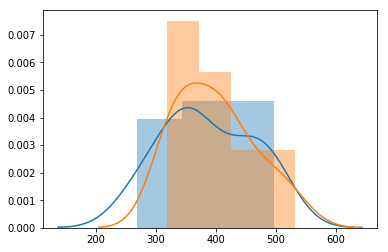

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.distplot(Alchohol_Consumption_before)
sns.distplot(Alchohol_Consumption_after) 

In [4]:
import  scipy.stats  as stats  
t_statistic, p_value  =  stats.ttest_1samp(D, 0)
print('P Value %1.3f' % p_value)  

P Value 0.597


### Step 5:  Decide to reject or accept null hypothesis

In this example, p value is 0.597 and it is more than 5% level of significance

So the statistical decision is to accept the null hypothesis at 5% level of significance.

### There is  no sufficient evidence  to reject the null hypothesis. So we accept the null hypotheis and conclude that  there is no effect of love failure on alcohol consumption

### Practice Exercise 3

Here weight of 25 people were recorded before they had a new therapy and then again 6 months later. 
Check if new therapy leads to a change in weight.

In [5]:
wt_before = np.array([76, 76, 72, 73, 64, 63, 75, 75, 71, 76, 71, 76, 78, 73, 76, 70, 71, 82, 84, 68, 70, 68, 66, 67, 74])
wt_after  = np.array([63, 72, 67, 69, 58, 59, 70, 71, 70, 71, 68, 71, 72, 69, 72, 67, 67, 78, 79, 62, 67, 63, 61, 63, 69])
D  = wt_after - wt_before
import  scipy.stats  as stats  
t_statistic, p_value  =  stats.ttest_1samp(D, 0)
print(t_statistic)
print(p_value)  

-11.381954836452902
3.704651177780503e-11


At 5% level of significance, is there any evidence that the new therapy has any effect on the weight of the participants?

Hint: Use a paired t test

### Take home exercises

**1 Example: The following data represent the amount of soft drink filled in a sample of 50 consecutive 2-liter bottles as shown below:**

|       |       |       |       |       |       |       |       |       |       |
| ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- |
| 2.109 | 2.086 | 2.066 | 2.075 | 2.065 | 2.057 | 2.052 | 2.044 | 2.036 | 2.038 | 
| 2.031 | 2.029 | 2.025 | 2.029 | 2.023 | 2.020 | 2.015 | 2.014 | 2.013 | 2.014 | 
| 2.012 | 2.012 | 2.012 | 2.010 | 2.005 | 2.003 | 1.999 | 1.996 | 1.997 | 1.992 | 
| 1.994 | 1.986 | 1.984 | 1.981 | 1.973 | 1.975 | 1.971 | 1.969 | 1.966 | 1.967 | 
| 1.963 | 1.957 | 1.951 | 1.951 | 1.947 | 1.941 | 1.941 | 1.938 | 1.908 | 1.894 | 

At 5% level of significance, is there evidence that the mean amount of soft drink filled is different from 2 litres? 


#### Hint: Use the following piece of code and try t test for one sample

In [19]:
import numpy       as np
import scipy.stats as stats
volume = np.array([2.109, 2.086, 2.066, 2.075, 2.065, 2.057, 2.052, 2.044, 2.036, 2.038, \
                   2.031, 2.029, 2.025, 2.029, 2.023, 2.020, 2.015, 2.014, 2.013, 2.014,\
                   2.012, 2.012, 2.012, 2.010, 2.005, 2.003, 1.999, 1.996, 1.997, 1.992,\
                   1.994, 1.986, 1.984, 1.981, 1.973, 1.975, 1.971, 1.969, 1.966, 1.967,\
                   1.963, 1.957, 1.951, 1.951, 1.947, 1.941, 1.941, 1.938, 1.908, 1.894])

print('Mean is %3.2f and standard deviation is %3.2f' %(volume.mean(),np.std(volume,ddof = 1)))

Mean is 2.00 and standard deviation is 0.04


**2. Sugar consumption in grams of 20 patients (both diabetic and non-diabetic) are given below:**

*At 5% level of significance, is there evidence that the mean sugar consumption is different for diabetic and non-diabetic?**    In the following table, 0 means diabetic and 1 means non-diabetic.*
    

In [20]:
import numpy       as np
import scipy.stats as stats
weight               = np.array([[9.31, 0],[7.76, 0],[6.98, 1],[7.88, 1],[8.49, 1],[10.05, 1],[8.80, 1],[10.88, 1],[6.13, 1],[7.90, 1], \
                            [11.51, 0],[12.59, 0],[7.05, 1],[11.85, 0],[9.99, 0],[7.48, 0],[8.79, 0],[8.69, 1],[9.68, 0],[8.58, 1],\
                           [9.19, 0],[8.11, 1]])

sugar_diabetic       = weight[:,1] == 0
sugar_diabetic       = weight[sugar_diabetic][:,0]
sugar_nondiabetic    = weight[:,1] == 1
sugar_nondiabetic    = weight[sugar_nondiabetic][:,0] 

#### Hint: 

Use the numpy array, sugar_diabetic and numpy array, sugar_nondiabetic for your analysis.

**3 The delivery time of Pizza from an online food deliery service firm and the home delivery from a local restaurant are given below: At 5% level of significance, is the mean delivery time for online delivery food service firm is less than the mean delivery time for the home delivery from a local restaurant.**

In [7]:
Pizza_delivery_online = [16.8, 11.7, 15.6, 16.7, 17.5, 18.1, 14.1, 21.8, 13.9, 20.8]
Pizza_delivery_local  = [22.0, 15.2, 18.7, 15.6, 20.8, 19.5, 17.0, 19.5, 16.5, 24.0]

In [8]:
t_statistic, p_value  =  stats.ttest_ind(Pizza_delivery_local,Pizza_delivery_online)
print(p_value)    

0.11960554332464257


## End

In [23]:
stats.t.isf(df = 24,q = 0.025)

2.063898561628021

In [25]:
stats.t.cdf(df = 24,x = 2.06)

0.9747996043270939